## **Yapay Sinir Ağı Oluşturma**

**Hurma Türlerinin Sınıflandırılması**

Bu projede, hurma türlerini sınıflandırmak için bir sinir ağı inşa edeceğiz. Bunun için Kaggle’da bulunan “Hurma Veri Seti” kullanılmıştır. Bu veri seti, türlerine göre 7 sınıfa ayrılabilen hurma örneklerini içermektedir.



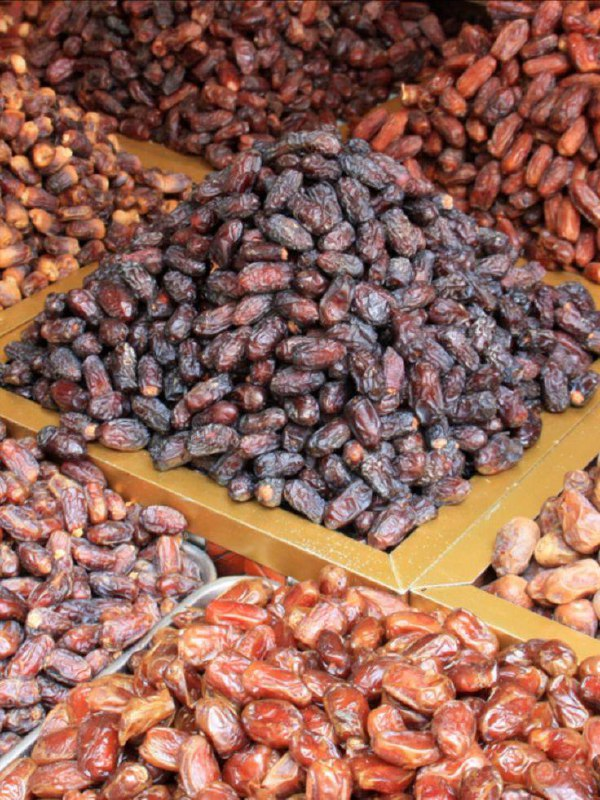


Gerekli kütüphaneleri içe aktararak başlayacağız.


In [ ]:
#Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

#Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split

## Veri Kümesi
.xlsx dosyasını yükleyelim.

📌 Pandas kütüphanesinin read_excel() fonksiyonunu kullanın.

In [ ]:

from google.colab import files
uploaded = files.upload()

#Read the "date_fruit.xlsx" file
df = pd.read_excel('date_fruit.xlsx')

Saving date_fruit.xlsx to date_fruit.xlsx


 **Ön işleme devam etmeden önce, verilere head yöntemini kullanarak bir göz atmak her zaman iyi bir fikirdir.**

In [ ]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [ ]:
print(df.shape)
print(df['Class'].unique())


(898, 35)
['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


Veri kümesinin 898 örnek içerdiğini ve 35 özelliğe sahip olduğunu, ayrıca türlerine göre 7 sınıfa ayrıldığını görüyoruz.


# Veri Ön işleme
Artık verilerimizi daha iyi anladığımıza göre, veri setini özelliklere ve etiketlere bölelim.

📌 .drop() ve .loc() yöntemlerini kullanarak X ve y veri setlerini oluşturun

In [ ]:
# Özellikler (X) veri setini oluşturma (Class sütunu hariç tüm sütunlar)
X = df.drop('Class', axis=1)

# Etiketler (y) veri setini oluşturma (Class sütunu)
y = df.loc[:, 'Class']


### Özellik ölçekleme

Derin öğrenmede farklı birimlerde veya aralıklarda özelliklere sahip olmak sorunlu olabilir. 0 ile 1 aralığı arasındaki tüm değerleri ölçeklememiz gerekir.

📌 sklearn kütüphanesinin minmax_scale() fonksiyonunu kullanın.


In [ ]:
# Özellikleri normalize et (0-1 aralığı)
from sklearn.preprocessing import minmax_scale
X_scaled = minmax_scale(X)

# Normalize edilmiş özellikleri DataFrame'e dönüştürme
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Yeni DataFrame'i kontrol etme
print(X_scaled_df.head())  # İlk 5 satırı görüntüleyebilirsin


       AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  0.772274   0.772079    0.565604    0.841941      0.446429  0.871512   
1  0.617835   0.617480    0.436904    0.775906      0.342186  0.773229   
2  0.964674   0.913374    0.681733    0.933143      0.464896  0.981104   
3  0.761063   0.757502    0.554467    0.841456      0.430098  0.864727   
4  0.635159   0.657060    0.482240    0.759716      0.460470  0.784821   

   SOLIDITY  CONVEX_AREA    EXTENT  ASPECT_RATIO  ...    SkewRB  KurtosisRR  \
0  0.983209     0.767108  0.787438      0.000435  ...  0.395739    0.062495   
1  1.000000     0.611906  0.776970      0.000282  ...  0.350002    0.037387   
2  0.992537     0.956896  0.736842      0.000467  ...  0.472509    0.083531   
3  0.983831     0.755891  0.766502      0.000408  ...  0.687121    0.136202   
4  0.958955     0.633316  0.711253      0.000459  ...  0.464794    0.040608   

   KurtosisRG  KurtosisRB  EntropyRR  EntropyRG  EntropyRB  ALLdaub4RR  \
0    0

Veri setimizi normalize ettikten sonra, hem orijinal hem de normalize edilmiş veri setlerinin ilk 5 satırını yazdırarak farkı görelim.

📌 .head() metodunu kullanalım.

In [ ]:
# Orijinal ve normalize edilmiş veri setlerini yazdırma
print("Ham veri:")
print(X.head())

print("\nNormalize edilmiş veri:")
print(X_scaled_df.head())


Ham veri:
     AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   

   SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  SkewRB  KurtosisRR  \
0    0.9947       424428  0.7831        1.2976  ...  0.6019      3.2370   
1    0.9974       339014  0.7795        1.2161  ...  0.4134      2.6228   
2    0.9962       528876  0.7657        1.3150  ...  0.9183      3.7516   
3    0.9948       418255  0.7759        1.2831  ...  1.8028      5.0401   
4    0.9908       350797  0.7569        1.3108  ...  0.8865      2.7016   

   KurtosisRG  KurtosisRB    EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  \
0      2.9574      4.2287 

Özelliklerimiz eğitime hazır. Şimdi etiketleri hazırlama zamanı.

📌 Bir göz atmak için y'yi yazdırın.

In [ ]:
# Etiketler (y) veri setini yazdırma
print(y)


0      BERHI
1      BERHI
2      BERHI
3      BERHI
4      BERHI
       ...  
893    SOGAY
894    SOGAY
895    SOGAY
896    SOGAY
897    SOGAY
Name: Class, Length: 898, dtype: object


Yapay zeka algoritmalarının model eğitimi sırasında string (metin) verileri kullanamıyor. Bunun sebebi, matematiksel işlemlerin string veriler üzerinde gerçekleştirilememesidir. Yani, algoritmaların sayısal verilere (tamsayı, ondalıklı sayı vb.) ihtiyaçları vardır, çünkü bu sayılar üzerinde matematiksel işlemler yapılabiliriz.

LabelEncoder Kullanımı: LabelEncoder, string sınıflarını (örneğin, “Kırmızı”, “Mavi”, “Yeşil”) tamsayı değerlere (örneğin, 0, 1, 2) dönüştürmek için kullanılır. Bu sayede algoritma, verileri işleyebilir.

📌 Metin verilerini tam sayılara dönüştürmek için sklearn kütüphanesinin LabelEncoder'ını kullanıyoruz.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesini oluştur
le = LabelEncoder()

# String sınıfları tamsayıya dönüştürme
y_encoded = le.fit_transform(y)

# Dönüştürülmüş etiketleri yazdırma
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

## Bölme
Şimdi, veri setini eğitim, doğrulama ve test veri setlerine bölüyoruz. Örneğimizde, bölme oranı eğitim için %80, doğrulama için %10 ve test setleri için %10'dur. Sonrasında sonuçlarımızı kontrol etmek için başlangıç ​​veri setinin toplam uzunluğunu ve yeni oluşturulan veri setlerinin boyutlarını yazdıralım.

📌 sklearn kütüphanesinin train_test_split fonksiyonunu kullanın.


In [ ]:
from sklearn.model_selection import train_test_split

# Eğitim ve geçerli+test olarak bölme (%80 eğitim, %20 geçerli+test)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Kalan %20'yi doğrulama (%10) ve test (%10) olarak bölme
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Orijinal veri setinin uzunluğunu yazdır

print("Toplam veri seti uzunluğu:", len(X))

# Setlerin boyutlarını yazdırma
print("Eğitim seti boyutu:", X_train.shape)
print("Doğrulama seti boyutu:", X_val.shape)
print("Test seti boyutu:", X_test.shape)


Toplam veri seti uzunluğu: 898
Eğitim seti boyutu: (718, 34)
Doğrulama seti boyutu: (90, 34)
Test seti boyutu: (90, 34)


## Sinir Ağ Modelini Oluşturma
Verilerimiz bir modelde kullanılmaya hazır. Derin öğrenme modeli oluşturmaya başlıyoruz. Bunun için TensorFlow kullanacağız. CPU üzerinden modelimi oluşturmaya başlıyorum.


 (Eğer Google Colab'ınız sınırlı değilse burada GPU'u etkinleştirerek devam edebilirsiniz. Bu süresini hızlandırmanızı sağlayacaktır.)

📌 TensorFlow'u içe aktarın

In [ ]:
# TensorFlow'u içe aktarma
import tensorflow as tf


Keras'ın Sequential API'sini kullanarak bir model nesnesi oluşturarak başlayalım.

📌 Bir model nesnesi oluşturmak için tf.keras.Sequential() kullanın

In [ ]:
# Gerekli Kütüphaneleri İçe Aktarma
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout



### Giriş Katmanı
Öncelikle, bir giriş katmanı oluşturuyoruz ve bunu bir değişkene atıyoruz. İlk argüman, bu katmanda istediğimiz nöron sayısını belirtir. Sadece giriş katmanı için, input_shape argümanını belirlememiz gerekiyor; bu, sütun sayısını ifade eder ve bu durumda 34’tür. Aktivasyon fonksiyonu olarak "ReLU" belirtiyoruz.

*  tf.keras.layers.Dense() kullanarak katmanı oluşturun.
*  Katmanı eklemek için nesnenin .add() metodunu kullanın.




In [ ]:
# Model nesnesi oluşturma
model = Sequential()

### Giriş Katmanı
# Giriş katmanı ekleme
model.add(Dense(34, activation='relu', input_shape=(X_train.shape[1],)))  # 34 özellik

### Gizli Katmanlar
Sonrasında, gizli katmanları ekliyoruz. Her biri 4096 nöron içeren 4 gizli katman ekleyeceğiz. Yine, aktivasyon fonksiyonu olarak ReLU’yu belirtiyoruz ve %50 dropout uygulayacağız.

*  tf.keras.layers.Dense() kullanarak katmanları oluşturun.
*  Katmanı eklemek için nesnenin .add() metodunu kullanın.



In [ ]:
### Gizli Katmanlar
# 4 adet gizli katman ekleme, her biri 4096 nöron içeriyor
for _ in range(4):
    model.add(Dense(4096, activation='relu'))  # ReLU aktivasyon fonksiyonu
    model.add(Dropout(0.5))  # %50 oranında dropout

### Çıkış Katmanı
Sinir ağımızın son kısmı olarak, çıkış katmanını ekliyoruz. Nöron sayısı, hedef sınıfların sayısına eşit olacak; bu durumda bu sayı 7’dir. Çıkış katmanında softmax aktivasyon fonksiyonunu kullanacağız.

In [ ]:
### Çıkış Katmanı
# Çıkış katmanı ekleme
model.add(Dense(7, activation='softmax'))  # 7 sınıf için softmax aktivasyonu

### Optimizasyon Yöntemi

Artık modelimizin yapısını oluşturduk. Modeli eğitime hazırlamak için .compile() metodunu kullanacağız. Compile metodunun içinde aşağıdaki bileşenleri tanımlamamız gerekiyor:

 • Optimizasyon yöntemi olarak “Adam”
 • Kayıp fonksiyonu olarak “Sparse Categorical Crossentropy”

📌 Modeli .compile() metodu ile oluşturun.

In [ ]:
# Modeli derleme (compile)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Modelin Eğitimi

Modeli eğitme zamanı geldi. İlk iki argüman olarak X_train ve y_train veri setlerini vereceğiz. Bu veri setleri modelin eğitimi için kullanılacaktır. Ayrıca validation_data parametresi ile X_val ve y_val veri setlerini bir tuple olarak vereceğiz.

*  Eğitimi gerçekleştirmek için model nesnesinin .fit() metodunu kullanın.


In [ ]:
# Modeli 100 epoch boyunca eğitme
results = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9307 - loss: 0.2994 - val_accuracy: 0.9444 - val_loss: 0.3004
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8996 - loss: 0.2459 - val_accuracy: 0.9111 - val_loss: 0.2888
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9134 - loss: 0.2586 - val_accuracy: 0.8667 - val_loss: 0.2962
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9141 - loss: 0.2076 - val_accuracy: 0.9667 - val_loss: 0.1128
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9477 - loss: 0.1530 - val_accuracy: 0.9222 - val_loss: 0.2312
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9429 - loss: 0.1929 - val_accuracy: 0.9556 - val_loss: 0.1454
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9475 - loss: 0.1422 - val_accuracy: 0.7778 - val_loss: 1.1133
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9053 - loss: 0.2507 - val_accuracy: 0.8778 - v

Bu noktada, eğitim sürecinin önemli bileşenleri olan epoch ve doğrulama verisi (validation data) kavramlarına değinmek faydalı olacaktır.

**Epoch**

 *  Epoch, modelin eğitim verilerini bir kez tamamen geçirdiği döngüdür. Örneğin, bir modelin 100 epoch boyunca eğitilmesi, modelin eğitim verisini toplamda 100 kez kullanarak ağırlıklarını güncellemesi anlamına gelir.
 *  Her bir epoch’ta model, eğitim verisini kullanarak ağırlıklarını günceller ve öğrenme sürecini ilerletir.

**Doğrulama Verisi (Validation Data)**

 *  Doğrulama verisi, modelin eğitim sırasında performansını değerlendirmek için kullanılan ayrı bir veri setidir. Model eğitilirken, doğrulama verisi kullanılarak modelin ne kadar iyi genelleme yaptığını görmek mümkündür.
 *  Doğrulama verisi, eğitim verisinden farklı olarak modelin performansını ölçmek ve aşırı öğrenmeyi (overfitting) tespit etmek için kritik öneme sahiptir.

#Sonuçları Görselleştirme

Model eğitildikten sonra, kayıp (loss) değerinin zamanla nasıl değiştiğini göstermek için bir grafik oluşturabiliriz. Sonuçlar şu şekilde tutulmaktadır:

 *  results.history["loss"]: Eğitim kaybı
 *  results.history["val_loss"]: Doğrulama kaybı

📌 plt.show() fonksiyonunu kullanarak grafiği görüntüleyin.

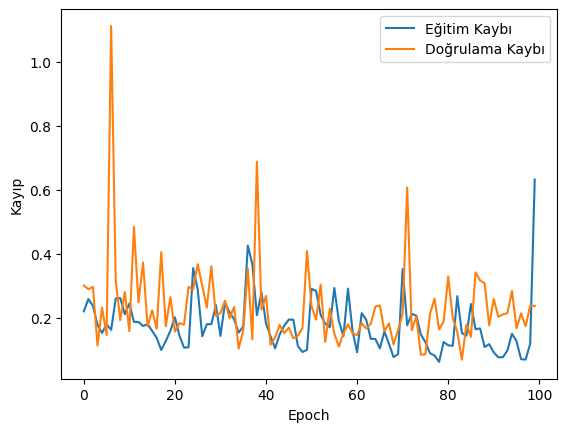

In [ ]:
import matplotlib.pyplot as plt

# Eğitim kaybını ve doğrulama kaybını çiz
plt.plot(results.history["loss"], label="Eğitim Kaybı")
plt.plot(results.history["val_loss"], label="Doğrulama Kaybı")

# Eksenleri adlandır
plt.xlabel("Epoch")
plt.ylabel("Kayıp")

# Efsane tablosunu ekle
plt.legend()

# Grafiği göster
plt.show()


Grafikte hem eğitim kaybı (mavi çizgi) hem de doğrulama kaybı (turuncu çizgi) 100 epoch boyunca izleniyor. Grafik üzerinde bazı önemli noktaları değindiğimizde:

 1. Başlangıçta Yüksek Kayıp:
 • Eğitimin ilk birkaç epoch’unda hem eğitim kaybı hem de doğrulama kaybı oldukça yüksek ve düzensiz. Bu, modelin henüz veriye tam olarak uyum sağlamadığını ve ağırlıklarının henüz optimize edilmediğini gösterir.
 2. Daha İyi Performans:
 • Epoch sayısı arttıkça kayıp değerlerinde genel olarak bir düşüş görülüyor. Bu da modelin öğrenmeye başladığını ve eğitim verisine daha iyi uyum sağladığını gösteriyor.
 3. Dengesizlikler:
 • Ara sıra doğrulama kaybında keskin yükselmeler ve düşüşler var (örneğin 10, 40 ve 70. epoch’ta). Bu, modelin doğrulama verisine karşı zaman zaman kötü performans gösterdiğini ve ardından toparladığını gösterir. Model aşırı uyum sağladığında (overfitting), bu tür ani değişimler olabilir.
 4. Kayıp Değerlerinin Yakınlığı:
 • Eğitim kaybı ve doğrulama kaybı birbirine yakın gidiyor, bu da genelde iyi bir işaret. Bu, modelin hem eğitim verisi üzerinde hem de doğrulama verisi üzerinde benzer şekilde performans gösterdiğini, yani aşırı öğrenme yapmadığını gösterebilir.

  Sonuç:
 • Model, öğrenme sürecinin sonunda (100 epoch’ta) oldukça düşük kayıp değerlerine ulaşıyor. Genel olarak bu, modelin iyi bir performans sergilediğini gösterir, ancak doğrulama verisi üzerindeki ani sıçramalar, modeli daha fazla optimize etmek için belki daha fazla epoch ya da daha iyi bir model yapısının gerekli olabileceğine işaret edebilir.



#Performans Değerlendirme

Son olarak, modelin performansını değerlendirmek için oluşturduğumuz test veri setini kullanacağız.

📌 Test veri setini parametre olarak kullanarak test_on_batch() yöntemini kullanın.

In [ ]:
# Performans değerlendirmesi
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Sonuçları yazdır
print("Test Kaybı:", test_loss)
print("Test Doğruluğu:", test_accuracy)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8653 - loss: 0.3333
Test Kaybı: 0.34753867983818054
Test Doğruluğu: 0.855555534362793


*  Doğru Sınıflandırma: %85’lik doğruluk, hurmaların büyük bir kısmını doğru sınıflandırdığınızı gösteriyor. Ancak %15’lik bir hata payı hala mevcut, yani bazı hurmalar yanlış sınıflandırılıyor.

*  Yanlış Sınıflandırma: Test kaybı (loss) oranı 0.347, yani modelin test setindeki hatalı tahminlerine karşılık gelen bir ölçüt. Bu oran hala makul, ancak daha da düşürülebilir.

Dolayısıyla, model hurmaları büyük ölçüde doğru sınıflandırmış, ancak yanlış sınıflandırılan bazı örnekler mevcut.